In [1]:
import numpy as np
import math
import pandas
import nsfg
import thinkstats2
import thinkplot
import relay

In [2]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [3]:
pmf.Prob(2)

0.4

In [4]:
pmf[2]

0.4

In [5]:
pmf.Incr(2, 0.2)
pmf.Prob(2)

0.6000000000000001

In [6]:
pmf.Mult(2, 0.5)
pmf.Prob(2)

0.30000000000000004

In [7]:
pmf.Total()

0.8999999999999999

In [8]:
pmf.Normalize()
pmf.Total()

1.0

In [9]:
df = nsfg.ReadFemPreg()

In [10]:
firsts = df[df.pregordr==1]
firsts_pmf = thinkstats2.Pmf(firsts.prglngth, label='Firsts')
others = df[df.pregordr!=1]
others_pmf = thinkstats2.Pmf(others.prglngth, label='Others')

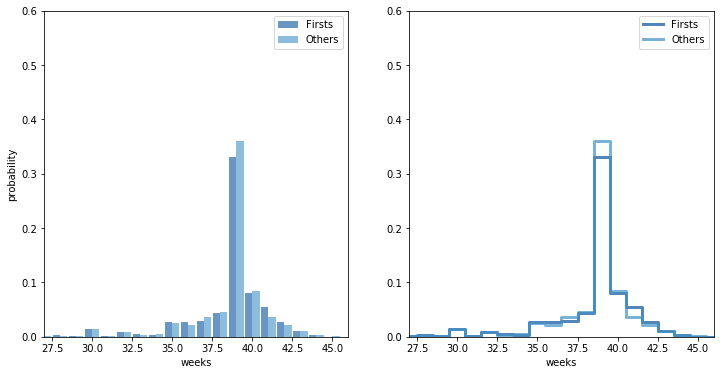

<Figure size 576x432 with 0 Axes>

In [11]:
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(firsts_pmf, align='right', width=width)
thinkplot.Hist(others_pmf, align='left', width=width)
thinkplot.config(xlabel='weeks', ylabel='probability', axis=[27, 46, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([firsts_pmf, others_pmf])
thinkplot.Show(xlabel='weeks', axis=[27, 46, 0, 0.6])


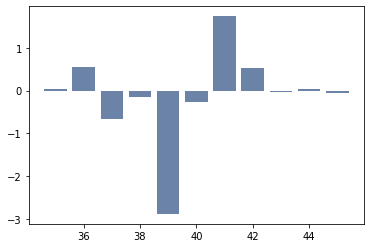

In [12]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = firsts_pmf.Prob(week)
    p2 = others_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)

In [13]:
d = {7:8, 12:8, 17:14, 22:4, 27:6, 32:12, 37:8, 42:3, 47:2}
pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())

mean 23.692307692307693


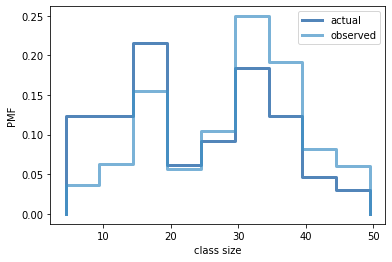

<Figure size 576x432 with 0 Axes>

In [14]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    
    new_pmf.Normalize()
    return new_pmf

biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')
        

In [15]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1/x)
    
    new_pmf.Normalize()
    return new_pmf

In [16]:
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,-2.185510,0.604523
1,-0.523713,0.077240
2,-0.535201,-0.240252
3,0.133419,-0.306395


In [17]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,-2.185510,0.604523
1,-0.523713,0.077240
2,-0.535201,-0.240252
3,0.133419,-0.306395


In [18]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-2.185510,0.604523
b,-0.523713,0.077240
c,-0.535201,-0.240252
d,0.133419,-0.306395


In [19]:
df['A']

a   -2.185510
b   -0.523713
c   -0.535201
d    0.133419
Name: A, dtype: float64

In [20]:
df.loc['a']

A   -2.185510
B    0.604523
Name: a, dtype: float64

In [21]:
df.iloc[0]

A   -2.185510
B    0.604523
Name: a, dtype: float64

In [22]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,-2.185510,0.604523
c,-0.535201,-0.240252


In [23]:
df['a':'c']

,A,B
a,-2.185510,0.604523
b,-0.523713,0.077240
c,-0.535201,-0.240252


In [24]:
df[0:2]

,A,B
a,-2.185510,0.604523
b,-0.523713,0.077240


# Exercises
## 3.1

In [25]:
df1 = nsfg.ReadFemResp()

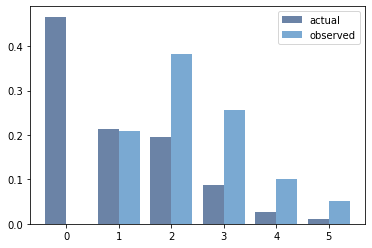

<Figure size 576x432 with 0 Axes>

In [26]:
nmkd = df1[df1.numkdhh!=float('nan')]
nmkd_pmf = thinkstats2.Pmf(nmkd.numkdhh, label='actual')
biasnmkd_pmf = BiasPmf(nmkd_pmf, 'observed')

width=0.4
thinkplot.PrePlot(3)
thinkplot.Hist(nmkd_pmf, align='right', width=width)
thinkplot.Hist(biasnmkd_pmf, align='left', width=width)
thinkplot.Show()

In [27]:
n, m = nmkd_pmf.Mean(), biasnmkd_pmf.Mean()
n, m, nmkd_pmf

(1.024205155043831,
 2.403679100664282,
 Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'actual'))

## 3.2 

In [28]:
def PmfMean(pmf):
    mlist = list()
    [mlist.append(p*x) for x, p in pmf.Items()]
    return sum(mlist)


def PmfVar(pmf):
    vlist = list()
    m = PmfMean(pmf)
    [vlist.append(((x-m)**2)*p) for x, p in pmf.Items()]
    
    return sum(vlist)
    
    
    
m1 = PmfMean(nmkd_pmf)
v1 = PmfVar(nmkd_pmf)
m1, v1, nmkd_pmf.Var()

(1.024205155043831, 1.4128643263531195, 1.4128643263531195)

## 3.3

In [29]:
bab2 = df1[df1.numkdhh>1]
resp_map = nsfg.MakePregMap(bab2)
df2 = nsfg.ReadFemPreg()
preg_map = nsfg.MakePregMap(df2)

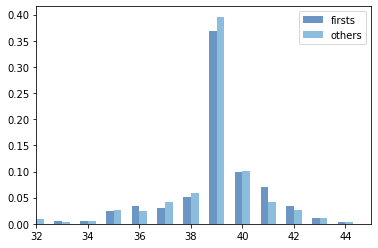

<Figure size 576x432 with 0 Axes>

In [30]:
indices = list()
[indices.extend(preg_map[id]) for id in resp_map]

preg_bab2 = df2.loc[indices]
firsts = preg_bab2[preg_bab2.pregordr==1]
others = preg_bab2[preg_bab2.pregordr!=1]

firsts_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
others_pmf = thinkstats2.Pmf(others.prglngth, label='others')

width = 0.3
thinkplot.PrePlot(2)
thinkplot.Hist(firsts_pmf, align='right', width=width)
thinkplot.Hist(others_pmf, align='left', width=width)
thinkplot.Show(xlim=[32, 45])

In [31]:
#No difference in results, first babies tend to be late deliveries than the babies later on for the same mother

## 3.4 

In [141]:
def group_vals(glist, gs):
    #gs : group size
    mival = min(glist)
    maval = max(glist)
    rlist = list()
    for val in glist:
        rlist.append(val//gs*gs)
    
    return rlist

In [150]:
res = relay.ReadResults()

In [151]:
speeds_raw = relay.GetSpeeds(res)
for x in speeds_raw:
    speeds.append(round(x, 1))

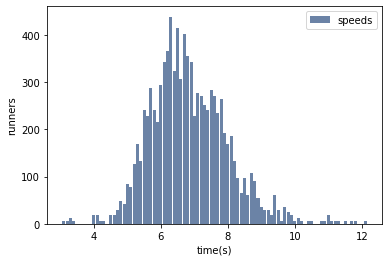

<Figure size 576x432 with 0 Axes>

In [152]:
speeds_hist = thinkstats2.Hist(speeds, label='speeds')
thinkplot.Hist(speeds_hist)
thinkplot.show(xlabel='time(s)', ylabel='runners')

In [153]:
def ObservedPmf(pmf, spe, label):
    new_pmf = pmf.Copy(label=label)
   
    for x, p in pmf.Items():
        fa = abs(x-spe)
        new_pmf.Mult(x, fa)
      
    new_pmf.Normalize()
    return new_pmf


speeds_pmf = thinkstats2.Pmf(speeds, label='speeds')
obs_pmf = ObservedPmf(speeds_pmf, 7.5, label='observed pmf')

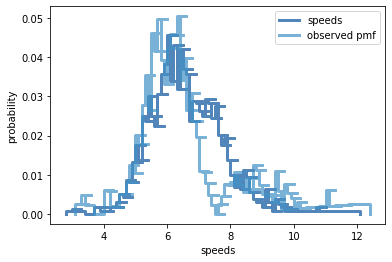

<Figure size 576x432 with 0 Axes>

In [154]:
thinkplot.PrePlot(2)
thinkplot.Pmf(speeds_pmf, align='right', width=0.3)
thinkplot.Pmf(obs_pmf, align='left', width=0.3)
thinkplot.Show(xlabel='speeds', ylabel='probability')